In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
import pandas as pd

metadata_path = 'HAM10000_metadata.csv'

metadata = pd.read_csv(metadata_path)

In [3]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

metadata_path = 'HAM10000_metadata.csv'

metadata = pd.read_csv(metadata_path)
metadata['image_path'] = metadata['image_id'].apply(lambda x: f'/Users/evelynyaskin/PycharmProjects/research/images/{x}.jpg')

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    dataframe=metadata,
    x_col='image_path',
    y_col='dx', 
    target_size=(150, 150),
    batch_size=32,  
    class_mode='categorical', 
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=metadata,
    x_col='image_path',
    y_col='dx', 
    target_size=(150, 150),
    batch_size=32, 
    class_mode='categorical', 
    subset='validation'
)

Found 372 validated image filenames belonging to 7 classes.
Found 92 validated image filenames belonging to 7 classes.


/Users/evelynyaskin/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9551 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/Users/evelynyaskin/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9551 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

num_classes = metadata['dx'].nunique()

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten()) 
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))  
model.add(Dense(num_classes))
model.add(Activation('softmax')) 

model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

/Users/evelynyaskin/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-04-16 21:05:42.122993: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-16 21:05:42.123018: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-04-16 21:05:42.123023: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-04-16 21:05:42.123316: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-16 21:05:42.123329: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/r

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,183,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 7)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,212,903 (4.63 MB)

 Trainable params: 1,212,903 (4.63 MB)

 Non-trainable params: 0 (0.00 B)

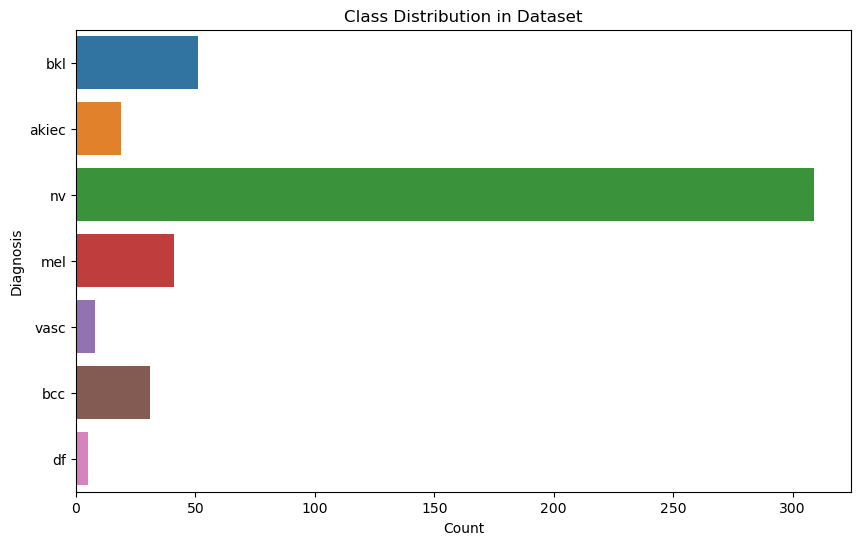

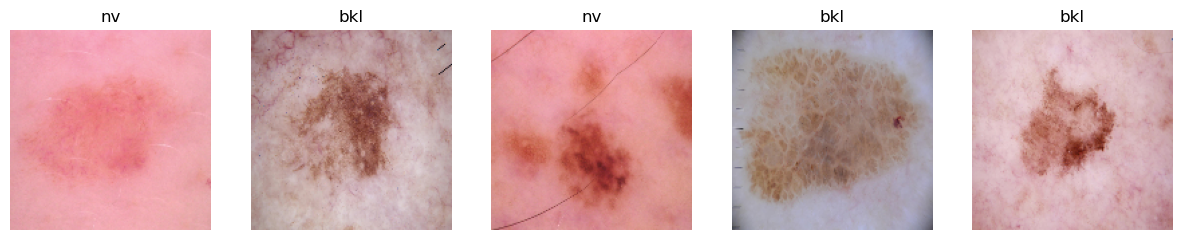

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing import image

import pandas as pd

metadata_path = 'HAM10000_metadata.csv'
metadata = pd.read_csv(metadata_path)

# Extract the numeric part of the image_id, assuming they are formatted like 'ISIC_0000001'
metadata['image_id_int'] = metadata['image_id'].apply(lambda x: int(x.split('_')[1]))

# Filter out the rows where the image_id_int is greater than 24769
metadata = metadata[metadata['image_id_int'] <= 24769]

# Shuffle the dataset
metadata = metadata.sample(frac=1).reset_index(drop=True)

train_val, test_data = train_test_split(metadata, test_size=0.15, random_state=42)
train_data, val_data = train_test_split(train_val, test_size=0.1765, random_state=42)  # Approximates to 15% of the original

# Visualizations
## Class Distribution in the entire dataset
plt.figure(figsize=(10, 6))
sns.countplot(y='dx', data=metadata)
plt.title('Class Distribution in Dataset')
plt.xlabel('Count')
plt.ylabel('Diagnosis')
plt.show()

# Update the image path assignment for the combined images directory
train_data['image_path'] = train_data['image_id'].apply(lambda x: f"images/{x}.jpg")

# Define a function to display sample images
def display_sample_images(data, n=5):
    fig, ax = plt.subplots(1, n, figsize=(15, 3))
    for i, row in enumerate(data.sample(n=n).iterrows()):
        img_path = row[1]['image_path']
        img = image.load_img(img_path, target_size=(150, 150))
        ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(row[1]['dx'])
    plt.show()

# Call the function to display sample images
display_sample_images(train_data)

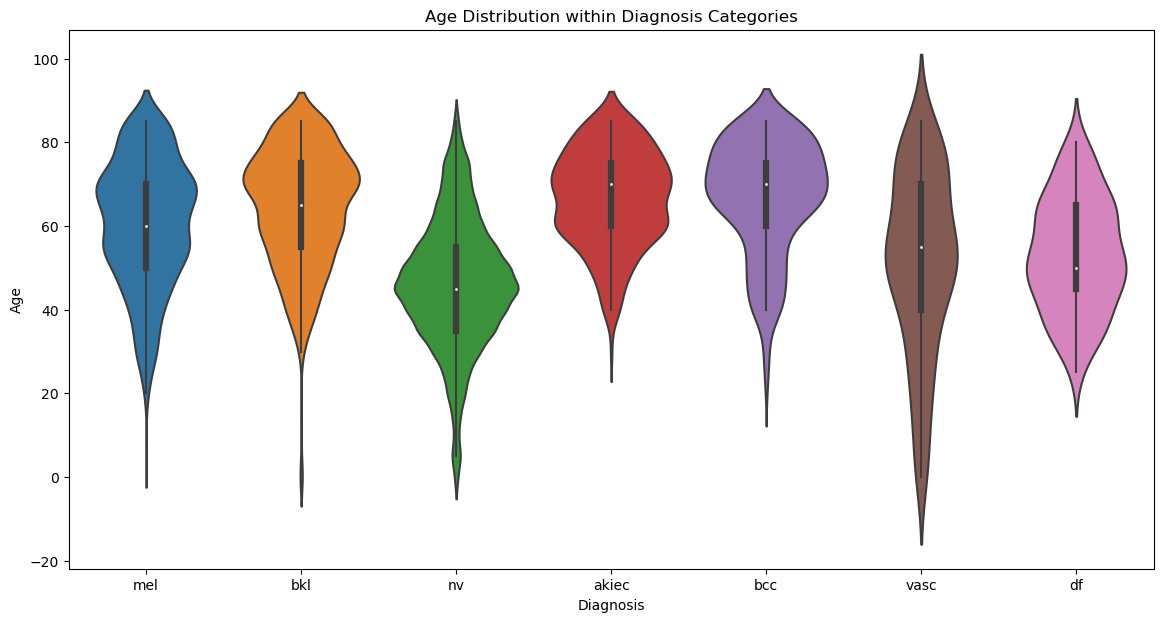

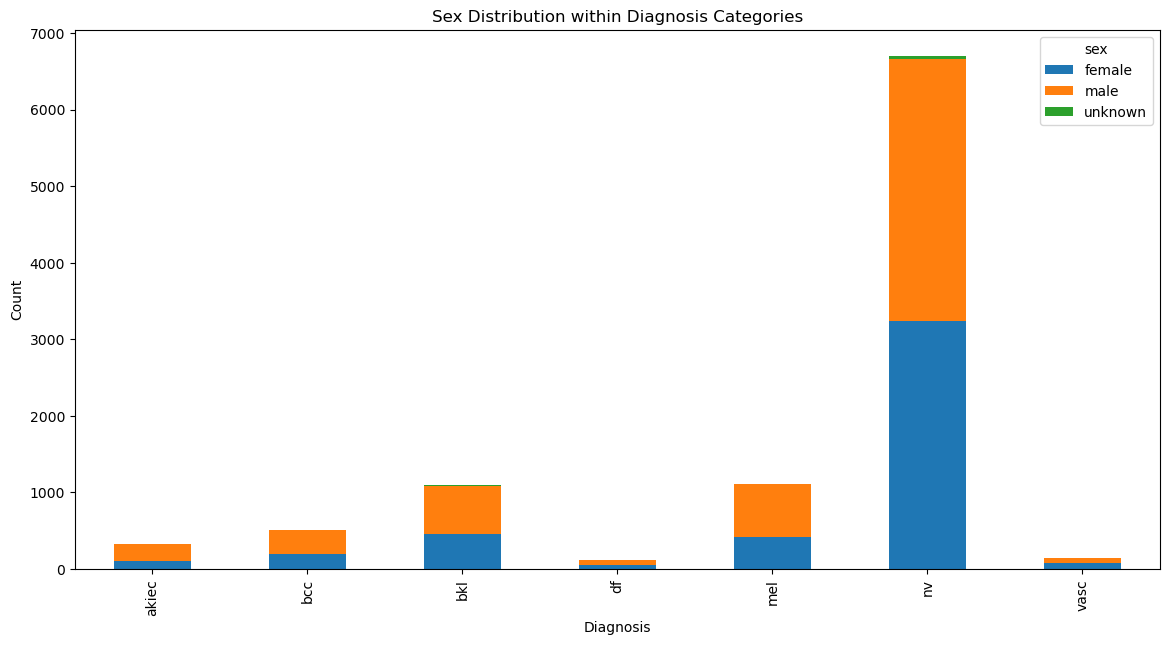

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age Distribution in Diagnosis Categories
plt.figure(figsize=(14, 7))
sns.violinplot(x='dx', y='age', data=metadata)
plt.title('Age Distribution within Diagnosis Categories')
plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.show()

# Sex Distribution in Diagnosis Categories
sex_dist = pd.crosstab(metadata['dx'], metadata['sex'])
sex_dist.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Sex Distribution within Diagnosis Categories')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


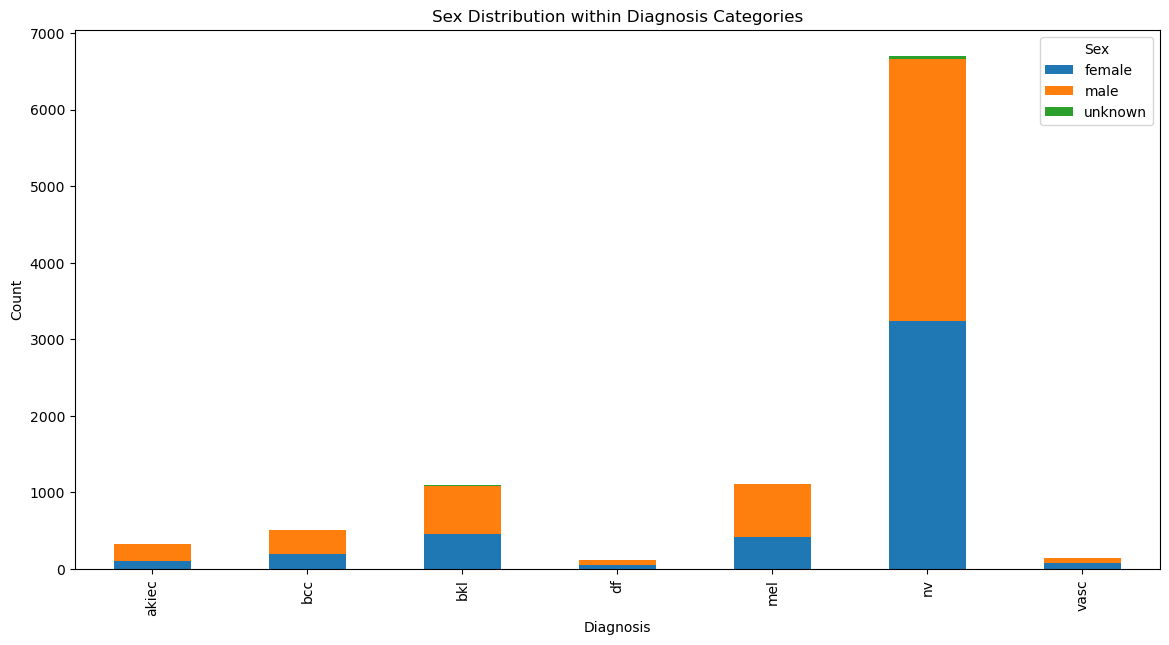

In [7]:
sex_dist = pd.crosstab(metadata['dx'], metadata['sex'])
sex_dist.plot(kind='bar', stacked=True, figsize=(14, 7), 
              color={'female': '#1f77b4', 'male': '#ff7f0e', 'unknown': '#2ca02c'})
plt.title('Sex Distribution within Diagnosis Categories')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()


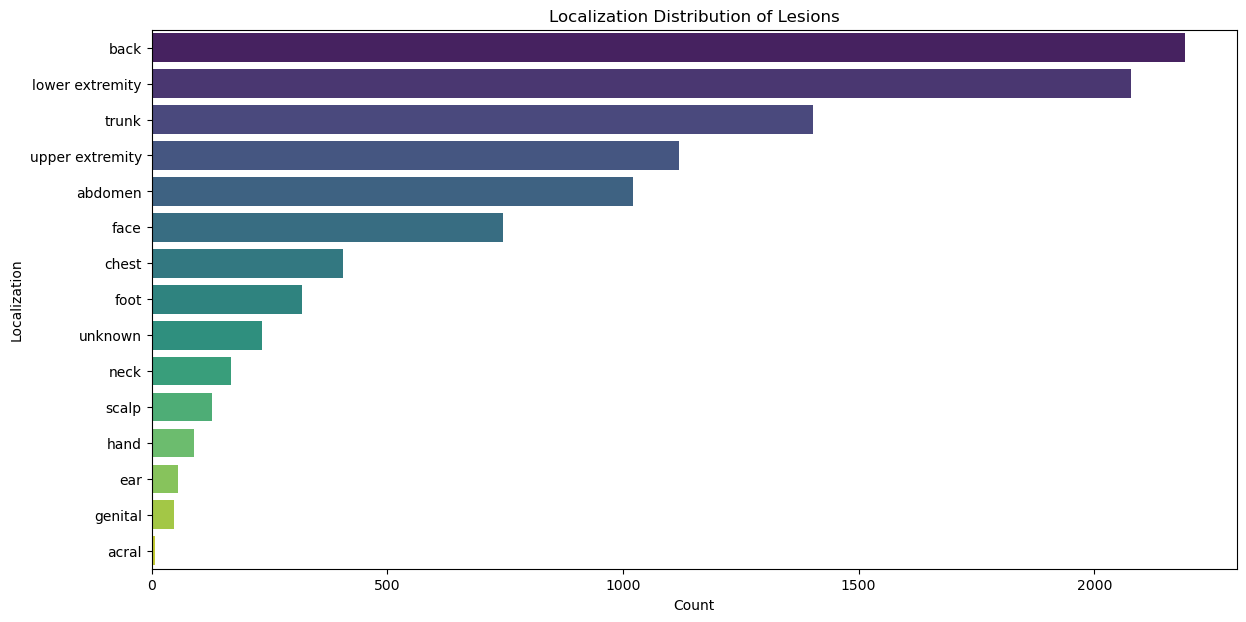

In [8]:
plt.figure(figsize=(14, 7))
sns.countplot(y='localization', data=metadata, palette="viridis", order = metadata['localization'].value_counts().index)
plt.title('Localization Distribution of Lesions')
plt.xlabel('Count')
plt.ylabel('Localization')
plt.show()


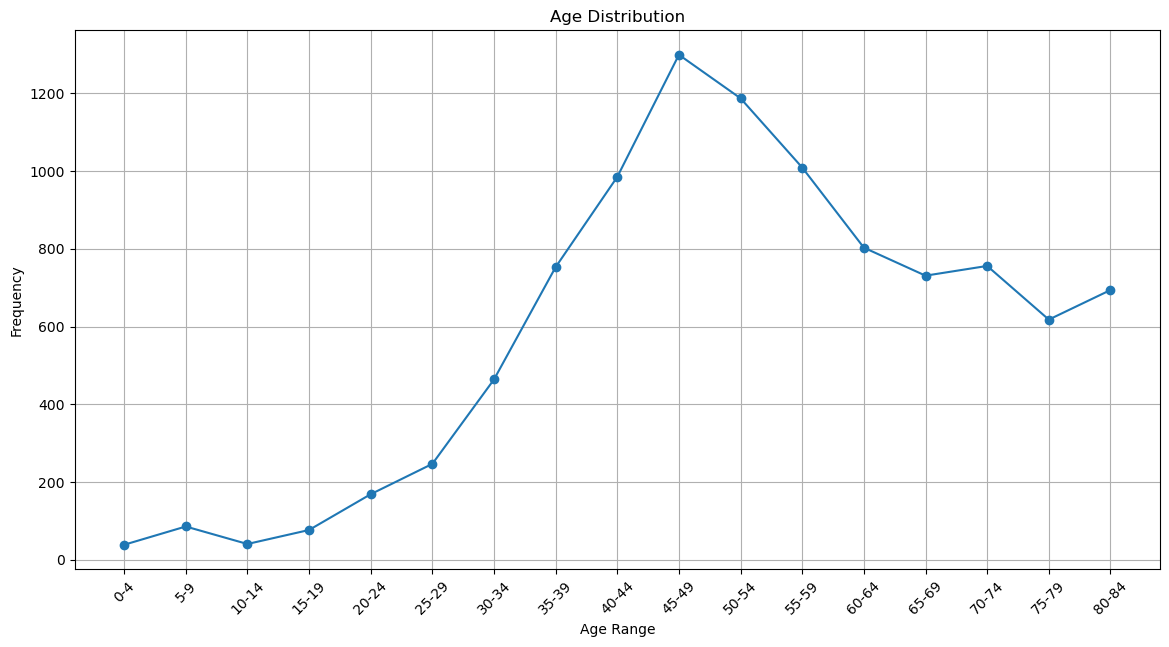

In [9]:
import numpy as np
# Define bins for the age range
bins = range(int(metadata['age'].min()), int(metadata['age'].max()) + 1, 5) # Adjust bin size as needed

# Calculate histogram data (counts of ages in bins)
age_counts, age_bins = np.histogram(metadata['age'].dropna(), bins=bins)

# Convert bins to string labels for plotting
age_labels = [f"{int(left)}-{int(right)-1}" for left, right in zip(age_bins[:-1], age_bins[1:])]

# Create a line plot
plt.figure(figsize=(14, 7))
plt.plot(age_labels, age_counts, marker='o')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Building the Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax') 
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/Users/evelynyaskin/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.model_selection import train_test_split
import os

metadata_path = 'HAM10000_metadata.csv'
metadata = pd.read_csv(metadata_path)

# Add a new column for image paths assuming the images are in 'images' directory
metadata['image_path'] = metadata['image_id'].apply(lambda x: os.path.join('images', f'{x}.jpg'))

# Split metadata into training and validation sets
train_df, val_df = train_test_split(metadata, test_size=0.2, random_state=42)

# Set up the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Use flow_from_dataframe to create the train and validation generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='.',  # Base directory, the path in 'image_path' should be relative to this
    x_col='image_path',  # Column in dataframe that contains the paths
    y_col='dx',  # Column in dataframe that contains the labels
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='.',
    x_col='image_path',
    y_col='dx',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 378 validated image filenames belonging to 7 classes.
Found 86 validated image filenames belonging to 7 classes.


/Users/evelynyaskin/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 7634 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/Users/evelynyaskin/anaconda3/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1917 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [12]:
# Fit the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    verbose=2
)

Epoch 1/15


2024-04-16 21:06:13.944943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/evelynyaskin/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 - 5s - 496ms/step - accuracy: 0.5780 - loss: 1.7009 - val_accuracy: 0.0312 - val_loss: 2.0703
Epoch 2/15
11/11 - 0s - 22ms/step - accuracy: 0.6250 - loss: 0.5783 - val_accuracy: 0.0000e+00 - val_loss: 1.0219
Epoch 3/15


2024-04-16 21:06:19.141594: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-16 21:06:19.141614: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 101008637974048966
2024-04-16 21:06:19.141618: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add/_36]]
2024-04-16 21:06:19.141641: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10813609469839216841
2024-04-16 21:06:19.141647: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 12000728370400307973
2024-04-16 21:06:19.141652: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 505046726048

11/11 - 4s - 405ms/step - accuracy: 0.6532 - loss: 1.1111 - val_accuracy: 0.0156 - val_loss: 2.5750
Epoch 4/15
11/11 - 0s - 17ms/step - accuracy: 0.7812 - loss: 0.3757 - val_accuracy: 0.0357 - val_loss: 1.4205
Epoch 5/15


2024-04-16 21:06:23.840495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-16 21:06:23.840512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_18/_40]]
2024-04-16 21:06:23.840518: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14660801774125998925
2024-04-16 21:06:23.840522: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14507530743978058719
2024-04-16 21:06:23.840525: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6947390245254612517
2024-04-16 21:06:23.840528: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 70717125

11/11 - 5s - 426ms/step - accuracy: 0.6734 - loss: 1.0185 - val_accuracy: 0.0156 - val_loss: 2.0262
Epoch 6/15
11/11 - 0s - 15ms/step - accuracy: 0.5938 - loss: 0.6652 - val_accuracy: 0.0357 - val_loss: 0.9193
Epoch 7/15


2024-04-16 21:06:28.718123: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-16 21:06:28.718143: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3333742950291454146
2024-04-16 21:06:28.718147: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 184216389386675032
2024-04-16 21:06:28.718150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_28]]
2024-04-16 21:06:28.718154: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10600437939401838130
2024-04-16 21:06:28.718157: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10813609469839216841
2024-04-1

11/11 - 5s - 421ms/step - accuracy: 0.6648 - loss: 1.0277 - val_accuracy: 0.0156 - val_loss: 1.9589
Epoch 8/15
11/11 - 0s - 15ms/step - accuracy: 0.6538 - loss: 0.5298 - val_accuracy: 0.0357 - val_loss: 0.9070
Epoch 9/15


2024-04-16 21:06:33.521567: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-16 21:06:33.521581: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_64]]
2024-04-16 21:06:33.521587: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10813609469839216841
2024-04-16 21:06:33.521589: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17297608276632473231
2024-04-16 21:06:33.521592: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15140452334580912843
2024-04-16 21:06:33.521595: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14660801774125998925
2024-0

11/11 - 5s - 411ms/step - accuracy: 0.6561 - loss: 0.9651 - val_accuracy: 0.0156 - val_loss: 1.9740
Epoch 10/15
11/11 - 0s - 16ms/step - accuracy: 0.6875 - loss: 0.4700 - val_accuracy: 0.1071 - val_loss: 0.9534
Epoch 11/15


2024-04-16 21:06:38.222597: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-16 21:06:38.222615: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3568643121687735362
2024-04-16 21:06:38.222619: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 184216389386675032
2024-04-16 21:06:38.222623: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 15411917024375928964
2024-04-16 21:06:38.222626: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_31]]
2024-04-16 21:06:38.222630: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 101008637974048966
2024-04-16 

11/11 - 5s - 440ms/step - accuracy: 0.6561 - loss: 0.9797 - val_accuracy: 0.0156 - val_loss: 1.8439
Epoch 12/15
11/11 - 0s - 15ms/step - accuracy: 0.7188 - loss: 0.4049 - val_accuracy: 0.0357 - val_loss: 0.9729
Epoch 13/15


2024-04-16 21:06:43.240333: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-16 21:06:43.240351: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_64]]
2024-04-16 21:06:43.240368: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 101008637974048966
2024-04-16 21:06:43.240374: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9795778376475472334
2024-04-16 21:06:43.240378: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3333742950291454146
2024-04-16 21:06:43.240389: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10813609469839216841
2024-04-16

11/11 - 5s - 412ms/step - accuracy: 0.6618 - loss: 0.9646 - val_accuracy: 0.0156 - val_loss: 2.4621
Epoch 14/15
11/11 - 0s - 19ms/step - accuracy: 0.5625 - loss: 0.7785 - val_accuracy: 0.0357 - val_loss: 1.0061
Epoch 15/15


2024-04-16 21:06:47.944087: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-04-16 21:06:47.944103: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_18/_40]]
2024-04-16 21:06:47.944110: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14660801774125998925
2024-04-16 21:06:47.944114: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14507530743978058719
2024-04-16 21:06:47.944118: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6947390245254612517
2024-04-16 21:06:47.944122: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 70717125

11/11 - 6s - 517ms/step - accuracy: 0.6676 - loss: 0.9723 - val_accuracy: 0.0156 - val_loss: 2.3595


In [1]:
import pandas as pd

# Load the metadata
metadata_path = 'HAM10000_metadata.csv'
metadata = pd.read_csv(metadata_path)

# Convert image_id to a format that can be compared numerically
metadata['numeric_id'] = metadata['image_id'].str.extract('(\d+)').astype(int)

# Define the maximum allowable image ID number
max_id = 24769

# Filter the DataFrame to include only valid image IDs
metadata = metadata[metadata['numeric_id'] <= max_id]

# Ensure the image_path column uses the original image_id
metadata['image_path'] = metadata['image_id'].apply(lambda x: f'/Users/evelynyaskin/PycharmProjects/research/images/{x}.jpg')

# Proceed with the rest of your setup


In [2]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

# Load the metadata if not already loaded
metadata_path = 'HAM10000_metadata.csv'
metadata = pd.read_csv(metadata_path)

# Extract the numeric part of the image_id, assuming they are formatted like 'ISIC_0000001'
metadata['image_id_num'] = metadata['image_id'].apply(lambda x: int(x.split('_')[1]))

# Filter out the rows where the image_id_num is greater than 24769
metadata = metadata[metadata['image_id_num'] <= 24769]

# Generate the correct image paths
metadata['image_path'] = metadata['image_id'].apply(lambda x: f"images/{x}.jpg")

# Shuffle the dataset
metadata = metadata.sample(frac=1).reset_index(drop=True)

# Create a dropdown to select the diagnosis category
category_dropdown = widgets.Dropdown(
    options=sorted(metadata['dx'].unique()),
    value=metadata['dx'].iloc[0],
    description='Diagnosis:',
    disabled=False,
)

# Create an output widget for displaying images
output_image = widgets.Output()

def update_image(change):
    with output_image:
        clear_output(wait=True)  # Clear the output area before displaying new images
        # Filter the DataFrame for the selected category and get up to the first 5 images
        filtered_data = metadata[metadata['dx'] == change['new']].head(5)
        num_images = filtered_data.shape[0]  # Count how many images we actually have
        # Create a figure with subplots
        fig, axes = plt.subplots(1, num_images, figsize=(num_images * 4, 4))  # Adjust size dynamically
        if num_images == 1:
            axes = [axes]  # Make it iterable if only one image
        for ax, (_, row) in zip(axes, filtered_data.iterrows()):
            img = mpimg.imread(row['image_path'])
            ax.imshow(img)
            ax.axis('off')  # Hide axes
        plt.show()

# Link the dropdown to the image display function
category_dropdown.observe(update_image, names='value')

# Display widgets
display(category_dropdown, output_image)

# Initially display the first five images
update_image({'new': category_dropdown.value})  # Manually trigger update for the first display


Dropdown(description='Diagnosis:', index=5, options=('akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'), value=…

Output()